## Data Wrangle Project - Udacity

## Intoduction

##### In this project we will clean and analyze data gathered from the twitter account @WeRateDogs,. In this account users like to rate dogs picture in a fun way, for exemple saying that a dog rate is 13/10.

##### We are going to use a messy dataframe gave by Udacity, with important content from tweets of @WeRateDogs, to make this dataframe more complete we will gather data directly from twitter via API.

##### Udacity also prepared a neutral network that can classify dogs breeds by tweets images, this neutral network is messy and has also some dirty data. 

##### The main goal of this project is to gather, clean and tidy all the data available and create visualizations.

## Gathering the data

There are 3 different data that will be necessary to gather.

1) The twitter archive enchanced, downloaded manually from Udacity.

2) The image prediction file, download must be programaticaly.

3) The tweets reactions using twitter API.

####    Gathaering the image prediction file

In [1]:
url_images = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [2]:
import requests
r = requests.get(url_images)
with open('image_predictions.tsv', 'wb') as f:
    f.write(r.content)

#### Gathering the data from twitter

One of the projects recommendations is to not show the API keys used, so to gather this data I used a <b>Sublime</b> text in the same directory I'm working. The code used is in the immage below.

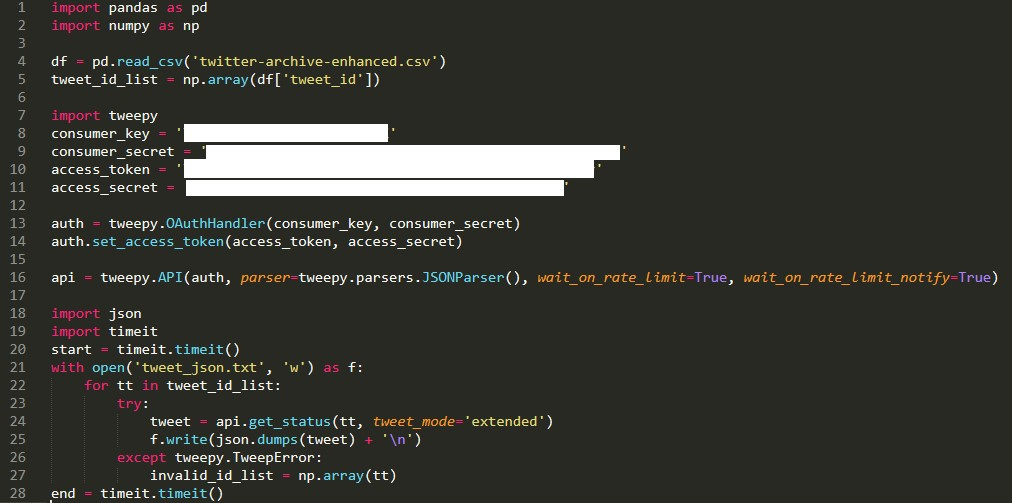

In [3]:
from IPython.display import Image
Image(filename='print_sublime2.jpg', width=550) 

## Accessing

Now that we have all data collected, we are going to access this data and make observations.

#### Accessing the Json file and creating a DataFrame

In [4]:
import json
organized_json = []
with open('tweet_json.txt', 'r') as jason_f:
    for line in jason_f:
        json_data = json.loads(line)
        organized_json.append({'tweet_id':json_data['id'], 'favorites':json_data['favorite_count'], 
                               'retweets':json_data['retweet_count'], 'timestamp':json_data['created_at']})

In [5]:
import pandas as pd
twitter_reactions = pd.DataFrame(organized_json, columns=['tweet_id', 'favorites', 'retweets', 'timestamp'])

In [6]:
twitter_reactions.sample(5)

,tweet_id,favorites,retweets,timestamp
949,750071704093859840,7828,3340,Mon Jul 04 21:00:04 +0000 2016
1086,733822306246479872,3639,1016,Sat May 21 00:50:46 +0000 2016
346,829861396166877184,12278,1957,Fri Feb 10 01:15:49 +0000 2017
82,876537666061221889,22161,4283,Sun Jun 18 20:30:39 +0000 2017
1942,673342308415348736,1224,550,Sun Dec 06 03:24:51 +0000 2015


In [7]:
twitter_reactions.duplicated().sum()

0

In [8]:
twitter_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   timestamp  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


The data is complete, just the timestamp column is with a wrong type, it should be a datetime instead of a string.

#### Accessing the images predictions dataframe

In [9]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1704,817415592588222464,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,Chihuahua,0.841084,True,Pomeranian,0.120530,True,Pekinese,0.006600,True
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
661,682429480204398592,https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg,1,whippet,0.594701,True,Italian_greyhound,0.314091,True,Mexican_hairless,0.037773,True


In [10]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_pred.duplicated().sum()

0

The data is complete, although the names of the breeds in columns `p1`, `p2` and `p3` looks messy. And there are too many columns.

#### Accessing the twitter-archive-enhanced

In [12]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [15]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [16]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

The columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`, `expanded_url` have missing values, we will drop those columns and respective rows.

The columns `doggo`, `floofer`, `pupper` and `puppo`can be in one column only, called `type`.

The names <b> one, a, O and old </b> must be changed to None.

Some rates are wrong and need to be fixed.

The `timestamp` column should be in datetime format, not string.

## Cleaning

We have 3 dataframes to clean and join what it's necessary.

1) `twitter_archive` : The CSV file given by udacity.

2) `image_pred` : The file that gives the breed by the picture of the tweet.

3) `twitter_reactions` : The number of likes and retweets for each post.

In [17]:
archive_clean = twitter_archive.copy()
image_clean = image_pred.copy()
reactions_clean = twitter_reactions.copy()

#### 1) Cleaning `twitter_archive` dataframe

We found the following issues to clean in this dataframe:

1.1) Drop columns with no useful and uncomplete data.

1.2) Drop rows with missing `expanded_urls` data.

1.3) Simplify dog stages.

1.4) Change wrong names to None and drop it.

1.5) Fix denominators below 10.

1.6) Format `timestamp` to datetime

<b> 1.1) Define </b>

Drop columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

<b> Code </b>

In [18]:
reply_index = archive_clean.query('in_reply_to_status_id > 0').index
retweets_index = archive_clean.query('retweeted_status_id > 0').index
archive_clean.drop(reply_index, axis=0, inplace=True)
archive_clean.drop(retweets_index, axis=0, inplace=True)

In [19]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

archive_clean = archive_clean.drop(columns_to_drop, axis=1)

<b> Test </b>

In [20]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


<b> 1.2) Define

The missing values in the `expanded_urls` column are mostly tweets without image, so I decided to drop those rows.

<b> Code

In [22]:
archive_clean.dropna(axis=0, inplace=True)

<b> Test

In [23]:
archive_clean[archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
archive_clean.shape[0]

2094

<b> 1.3) Define </b>

The columns `doggo`, `floofer`, `pupper` and `puppo`can be in one column only, called `type`.

<b> Code </b>

In [25]:
## At first i'm going to test the quality of the information in the columns
archive_clean.doggo.unique(), archive_clean.floofer.unique(), archive_clean.pupper.unique(), archive_clean.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [26]:
def stage_cond(dog):
    if dog['doggo'] == 'doggo':
        return dog['doggo']
    elif dog['floofer'] == 'floofer':
        return dog['floofer']
    elif dog['pupper'] == 'pupper':
        return dog['pupper']
    elif dog['puppo'] == 'puppo':
        return dog['puppo']
    else:
        return "No stage"

In [27]:
archive_clean['stage'] = archive_clean.apply(stage_cond, axis=1)
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [28]:
archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
676,789314372632018944,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,https://twitter.com/sebscat/status/78881832853...,13,10,None,No stage
2095,670764103623966721,2015-11-29 00:39:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vincent. He's a wild Adderall Cayenne. Sh...,https://twitter.com/dog_rates/status/670764103...,10,10,Vincent,No stage
1915,674318007229923329,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,https://twitter.com/dog_rates/status/674318007...,8,10,Lennon,pupper


<b> Test </b>

In [29]:
archive_clean.shape[0]

2094

In [30]:
archive_clean.stage.value_counts()

No stage    1759
pupper       220
doggo         83
puppo         23
floofer        9
Name: stage, dtype: int64

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   stage               2094 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


<b> 1.4) Define </b>

At column `name`, change the wrong names <b> one, a, O, old </b> to None. And drop missing values

<b> Code </b>

In [32]:
archive_clean.name.replace({'one':None, 'a':None, 'O':None, 'old':None, 'an':None}, inplace=True)

In [33]:
archive_clean.dropna(axis=0, inplace=True)

<b> Test </b>

In [34]:
archive_clean[archive_clean.name.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2027 non-null   int64 
 1   timestamp           2027 non-null   object
 2   source              2027 non-null   object
 3   text                2027 non-null   object
 4   expanded_urls       2027 non-null   object
 5   rating_numerator    2027 non-null   int64 
 6   rating_denominator  2027 non-null   int64 
 7   name                2027 non-null   object
 8   stage               2027 non-null   object
dtypes: int64(3), object(6)
memory usage: 158.4+ KB


<b> 1.5) Define

Check denominators are below 10

In [36]:
archive_clean.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120],
      dtype=int64)

In [37]:
archive_clean.query('rating_denominator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,No stage


The first one (index=516) doesn't have a rate, 24/7 means just time.

<b> Code

In [38]:
archive_clean.drop(516, inplace=True)

<b> Test

In [39]:
archive_clean.query('rating_denominator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


<b> 1.6) Define </b>

Change the the `timestamp` from srting to datetime.

<b> Code </b>

In [40]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

<b> Test </b>

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2026 non-null   int64              
 1   timestamp           2026 non-null   datetime64[ns, UTC]
 2   source              2026 non-null   object             
 3   text                2026 non-null   object             
 4   expanded_urls       2026 non-null   object             
 5   rating_numerator    2026 non-null   int64              
 6   rating_denominator  2026 non-null   int64              
 7   name                2026 non-null   object             
 8   stage               2026 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 158.3+ KB


#### 2) Cleaning `image_pred` dataframe

2.1) Apply lowercase in all cells for the columns `p1`,`p2` and `p3`.

2.2) Create `best_p_dog` and `p_conf` columns.

2.3) Drop columns :`p1`, `p1_dog`, `p1_conf`, `p2`, `p2_dog`, `p2_conf`, `p3`, `p3_dog`, `p3_conf`.

<b> 2.1) Define

Lowercase all the dogs breeds and replace underline to space.

<b> Code

In [42]:
predictions = ['p1', 'p2', 'p3']

for p in predictions:
    image_clean[p] = image_clean[p].str.lower()
    image_clean[p] = image_clean[p].replace({'_':' '}, regex=True)

<b> Test

In [43]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
308,671536543010570240,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,1,pug,0.537652,True,bull mastiff,0.220617,True,french bulldog,0.068297,True
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,shih-tzu,0.932401,True,lhasa,0.030806,True,tibetan terrier,0.008974,True
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood rabbit,0.702725,False,angora,0.190659,False,hare,0.105072,False
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,shetland sheepdog,0.880499,True,collie,0.107901,True,pembroke,0.003607,True


<b> 2.2) Define

Create new columns with the best prediction results

<b> Code

In [44]:
## The rows where all the predictions are false, means that there is no dog prediction on it
## So it's better to drop those rows.
indexnames = image_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').index
image_clean.drop(indexnames, inplace=True)

In [45]:
## Function to select the most likely breed prediction
def best_dog(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    else:
        return row['p3']

In [46]:
## Function to select the matching probability of the prediction.
def most_prob(p):
    if p['p1_dog']:
        return p['p1_conf']
    elif p['p2_dog']:
        return p['p2_conf']
    else: 
        return p['p2']

In [47]:
image_clean['best_p_dog'] = image_clean.apply(best_dog, axis=1)
image_clean['p_conf'] = image_clean.apply(most_prob, axis=1)

<b> Test

In [48]:
image_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_p_dog,p_conf
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,staffordshire bullterrier,0.843359,True,american staffordshire terrier,0.028290,True,miniature pinscher,0.016793,True,staffordshire bullterrier,0.843359
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,irish terrier,0.104109,True,dingo,0.062071,False,irish terrier,0.104109
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,irish water spaniel,0.567475,True,labrador retriever,0.169496,True,curly-coated retriever,0.101518,True,irish water spaniel,0.567475


In [49]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   bool   
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   bool   
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   bool   
 12  best_p_dog  1751 non-null   object 
 13  p_conf      1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


<b> 2.3) Define

Drop the columns that are no more useful.

<b> Code

In [50]:
image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 
                  'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

<b> Test

In [51]:
image_clean.sample(3)

,tweet_id,jpg_url,img_num,best_p_dog,p_conf
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden retriever,0.316704
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,malamute,indri


In [52]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1751 non-null   int64 
 1   jpg_url     1751 non-null   object
 2   img_num     1751 non-null   int64 
 3   best_p_dog  1751 non-null   object
 4   p_conf      1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


<b> 3) Cleaning `twitter_reactions` dataframe

The only thing we are going to clean here is the `timestamp` format to datetime

<b> Code </b>

In [53]:
reactions_clean['timestamp'] = pd.to_datetime(reactions_clean['timestamp'])

<b> Test

In [54]:
reactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2331 non-null   int64              
 1   favorites  2331 non-null   int64              
 2   retweets   2331 non-null   int64              
 3   timestamp  2331 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.0 KB


## Join DataFrames

We are going to use the function <b>merge</b> to join the twitter reactions to the twitter_archive file And then <b>merge</b> again to join with image prediction files.

Creating our master dataframe.

In [55]:
master_ds = pd.merge(archive_clean, reactions_clean, how='left', on=['tweet_id', 'timestamp'])

In [56]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2026 non-null   int64              
 1   timestamp           2026 non-null   datetime64[ns, UTC]
 2   source              2026 non-null   object             
 3   text                2026 non-null   object             
 4   expanded_urls       2026 non-null   object             
 5   rating_numerator    2026 non-null   int64              
 6   rating_denominator  2026 non-null   int64              
 7   name                2026 non-null   object             
 8   stage               2026 non-null   object             
 9   favorites           2019 non-null   float64            
 10  retweets            2019 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 189.9+ KB


In [57]:
master_ds.dropna(axis=0, inplace=True)

In [58]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 0 to 2025
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2019 non-null   int64              
 1   timestamp           2019 non-null   datetime64[ns, UTC]
 2   source              2019 non-null   object             
 3   text                2019 non-null   object             
 4   expanded_urls       2019 non-null   object             
 5   rating_numerator    2019 non-null   int64              
 6   rating_denominator  2019 non-null   int64              
 7   name                2019 non-null   object             
 8   stage               2019 non-null   object             
 9   favorites           2019 non-null   float64            
 10  retweets            2019 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 189.3+ KB


In [59]:
master_ds = pd.merge(master_ds, image_clean, how='right', on='tweet_id')

In [60]:
index_nan = master_ds[master_ds.favorites.isnull()].index
master_ds.drop(index_nan, inplace=True)

In [61]:
master_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1604 non-null   int64              
 1   timestamp           1604 non-null   datetime64[ns, UTC]
 2   source              1604 non-null   object             
 3   text                1604 non-null   object             
 4   expanded_urls       1604 non-null   object             
 5   rating_numerator    1604 non-null   float64            
 6   rating_denominator  1604 non-null   float64            
 7   name                1604 non-null   object             
 8   stage               1604 non-null   object             
 9   favorites           1604 non-null   float64            
 10  retweets            1604 non-null   float64            
 11  jpg_url             1604 non-null   object             
 12  img_num             1604 non-null 

## Visualizations and Insights

<b> The favorites and retweets looks to have a linear correlation

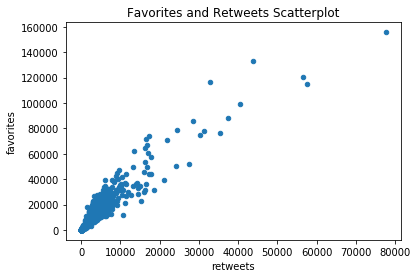

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
master_ds.plot(y='favorites', x='retweets', kind='scatter');
plt.title('Favorites and Retweets Scatterplot');

<b> The breed that shows up more is the Golden Retriever

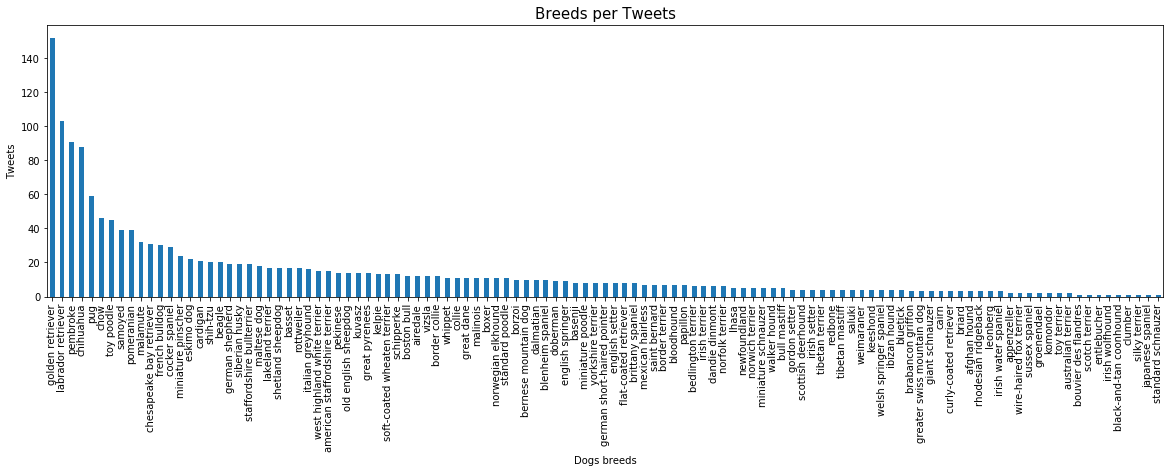

In [63]:
master_ds.best_p_dog.value_counts().plot(kind='bar', figsize=(20, 5));
plt.title('Breeds per Tweets', fontsize=(15));
plt.xlabel('Dogs breeds');
plt.ylabel('Tweets');

<b> Considering the tweets where we have information about the stage, the most common stage is the pupper

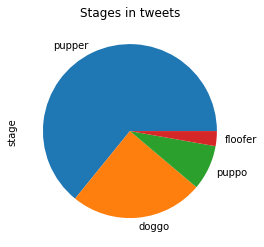

In [64]:
## This visualization does not consider the tweets with no stage info on it
master_ds.query('stage != "No stage"').stage.value_counts().plot(kind='pie');
plt.title('Stages in tweets');

In [65]:
master_ds.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,img_num
count,1.604000e+03,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,7.407170e+17,11.410848,10.468828,8796.324813,2561.875935,1.218204
std,6.807146e+16,7.508957,6.384901,12756.467603,4607.841804,0.579128
min,6.660209e+17,0.000000,10.000000,70.000000,11.000000,1.000000
25%,6.784076e+17,10.000000,10.000000,2068.250000,594.750000,1.000000
50%,7.158126e+17,11.000000,10.000000,4109.500000,1290.000000,1.000000
75%,7.936626e+17,12.000000,10.000000,10998.250000,2895.250000,1.000000
max,8.921774e+17,165.000000,150.000000,155624.000000,77560.000000,4.000000


In [66]:
master_ds.query('rating_numerator == 165') ### The highest rate given

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,best_p_dog,p_conf
579,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,No stage,4800.0,2224.0,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,labrador retriever,0.436377


In [67]:
master_ds.query('favorites == 155624') ### Tweet with more likes

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,best_p_dog,p_conf
670,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,155624.0,77560.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador retriever,0.825333


## Exporting

Now that we have all the data gathered and clean, its time to export it to a csv files.

In [68]:
master_csv = master_ds.to_csv('twitter_archive_master.csv')